In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels)= tf.keras.datasets.mnist.load_data()
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels)= tf.keras.datasets.cifar10.load_data()


In [ ]:
def get_image_augmentation():
  train_datagen = ImageDataGenerator(
      rotation_range=20,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      rescale= 1./255
  )

  test_datagen= ImageDataGenerator(rescale= 1./255)

  return train_datagen, test_datagen

In [ ]:
def simple_cnn(input_shape, classes= 10):
  model= tf.keras.models.Sequential(
    [
       tf.keras.layers.Conv2D(64, (3, 3), activation="relu",padding="same", input_shape= input_shape),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.MaxPool2D(2, strides=2, padding="valid"),
       tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.MaxPooling2D(2, strides= 2, padding="valid"),
       tf.keras.layers.Dropout(0.2),

       tf.keras.layers.Conv2D(256, (3, 3), activation= "relu", padding="same"),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Conv2D(256, (3, 3), activation= "relu", padding="same"),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.MaxPooling2D(2, strides= 2, padding="valid"),
       tf.keras.layers.Dropout(0.2),

       tf.keras.layers.Conv2D(512, (3, 3), activation= "relu", padding="same"),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Conv2D(512, (3, 3), activation= "relu", padding="same"),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.MaxPooling2D(2, strides= 2, padding="valid"),
       tf.keras.layers.Dropout(0.3),

       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(256, activation="relu"),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(128, activation="relu"),
       tf.keras.layers.Dense(classes, activation="softmax")
    ]
  )
  return model

In [ ]:
def plot_history(history, name):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.title(name)
  plt.legend()
  plt.show()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(name)
  plt.grid(True)
  plt.legend()
  plt.show()

In [ ]:
mnist_train_datagen, mnist_test_datagen= get_image_augmentation()
mnist_train_images = np.expand_dims(mnist_train_images, axis=-1)
mnist_test_images = np.expand_dims(mnist_test_images, axis=-1)

mnist_train_datagen.fit(mnist_train_images)
mnist_test_datagen.fit(mnist_test_images)

mnist_model= simple_cnn([28, 28, 1], 10)
mnist_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
mnist_history= mnist_model.fit(
    mnist_train_datagen.flow(mnist_train_images, mnist_train_labels),
    epochs=15,
    validation_data=mnist_test_datagen.flow(mnist_test_images, mnist_test_labels),
    callbacks= [tf.keras.callbacks.EarlyStopping(patience= 7, monitor='val_loss')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - accuracy: 0.8023 - loss: 0.6164 - val_accuracy: 0.9676 - val_loss: 0.1015
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9551 - loss: 0.1573 - val_accuracy: 0.9747 - val_loss: 0.0868
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9666 - loss: 0.1178 - val_accuracy: 0.9708 - val_loss: 0.1037
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9716 - loss: 0.1025 - val_accuracy: 0.9862 - val_loss: 0.0509
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9738 - loss: 0.0973 - val_accuracy: 0.9871 - val_loss: 0.0428
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9764 - loss: 0.0843 - val_accuracy: 0.9880 - val_loss: 0.0437
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9814 - loss: 0.0735 - val_accuracy: 0.9885 - val_loss: 0.0456
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9816 - loss: 0.06

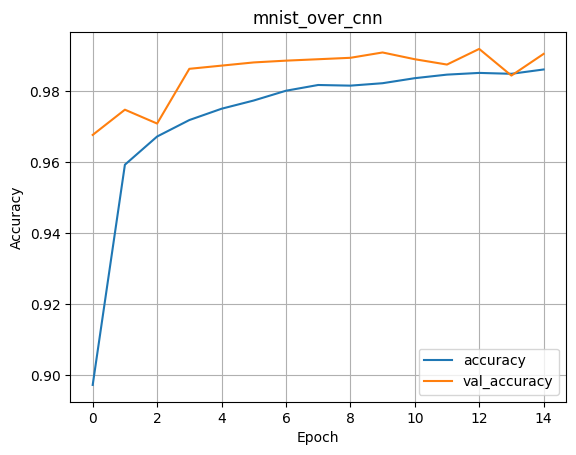

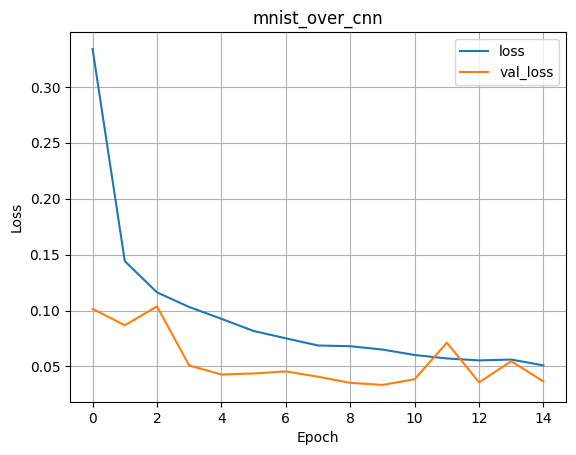

In [ ]:
plot_history(mnist_history, f'mnist_over_cnn')

In [ ]:
cifar_train_datagen, cifar_test_datagen= get_image_augmentation()

cifar_train_datagen.fit(cifar_train_images)
cifar_test_datagen.fit(cifar_test_images)

cifar_model= simple_cnn([32, 32, 3], 10)

cifar_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cifar_history= cifar_model.fit(
    cifar_train_datagen.flow(cifar_train_images, cifar_train_labels),
    epochs=15,
    validation_data=cifar_test_datagen.flow(cifar_test_images, cifar_test_labels),
    callbacks= [tf.keras.callbacks.EarlyStopping(patience= 7, monitor='val_loss')])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.3240 - loss: 1.9255 - val_accuracy: 0.5046 - val_loss: 1.3735
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5242 - loss: 1.3451 - val_accuracy: 0.5136 - val_loss: 1.4343
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6124 - loss: 1.1293 - val_accuracy: 0.5928 - val_loss: 1.2927
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6688 - loss: 0.9754 - val_accuracy: 0.7072 - val_loss: 0.8744
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.7064 - loss: 0.8724 - val_accuracy: 0.7297 - val_loss: 0.8231
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7356 - loss: 0.7926 - val_accuracy: 0.7805 - val_loss: 0.6554
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7503 - loss: 0.7413 - val_accuracy: 0.7607 - val_loss: 0.7198
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7655 -

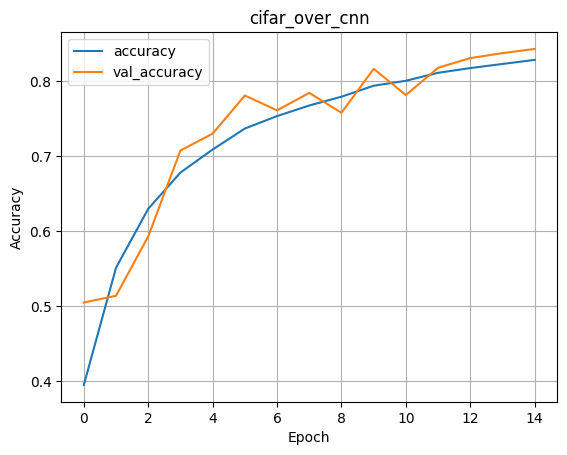

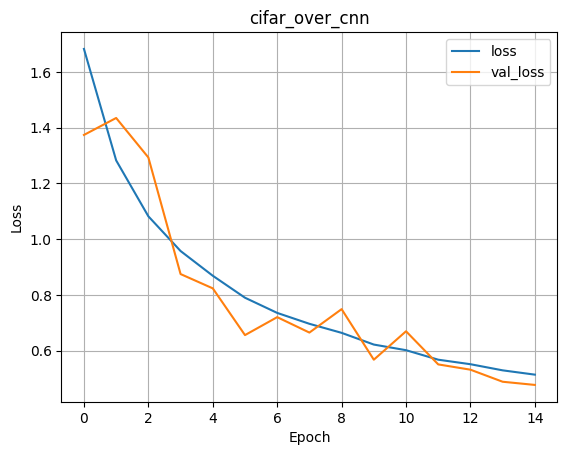

In [ ]:
plot_history(cifar_history, f'cifar_over_cnn')